In [56]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# New Section

We have used 80 depth images from both real and fake dataset. Split them in 70/30 for Training/CrossValidation . 20 images have been used to test model accuracy

In [58]:
import numpy as np
data_set_real=np.zeros((80,480,640))
data_set_virtual=np.zeros((80,480,640))
data_set_real.shape,data_set_virtual.shape

((80, 480, 640), (80, 480, 640))

In [59]:
#dataset path for training model
im_path_real1="/content/drive/MyDrive/ML_DATA/Project data/nyu/bedroom_0082_out/"
im_path_real_ofc="/content/drive/MyDrive/ML_DATA/Project data/nyu/nyu_office_1_out/"
im_path_virtual_ofc1="/content/drive/MyDrive/ML_DATA/Project data/virtual11/office1-depth-clean/"
im_path_virtual_ofc2="/content/drive/MyDrive/ML_DATA/Project data/virtual11/office2-depth-clean/"

In [89]:
#datasetpath for testing model accuracy
im_path_test_real="/content/drive/MyDrive/ML_DATA/Project data/nyu/bedroom_0086_out/"
im_path_test_virtual="/content/drive/MyDrive/ML_DATA/Project data/virtual11/office1-depth-clean/"

In [61]:
import cv2
from google.colab.patches import cv2_imshow
for i in range(10):
  path=im_path_virtual_ofc1+"0000"+str(i)+".png"
  data_set_virtual[i,:,:]=cv2.imread(path,cv2.IMREAD_UNCHANGED)

for i in range(70):
  path=im_path_virtual_ofc1+"000"+str(i+10)+".png"
  #print(path)
  data_set_virtual[i+10,:,:]=cv2.imread(path,cv2.IMREAD_UNCHANGED)

In [63]:
for i in range(80):
  path=im_path_real1+str(i)+".png"
  data_set_real[i,:,:]=cv2.imread(path,cv2.IMREAD_UNCHANGED)


In [64]:
from sklearn import preprocessing
temp=np.zeros((480,640))
data_set_real_normalized=np.zeros((80,480,640))
data_set_virtual_normalized=np.zeros((80,480,640))
for k in range(79):
  temp=data_set_real[k+1,:,:]
  #print(temp)
  data_set_real_normalized[k,:,:]=preprocessing.normalize(temp)
  temp=data_set_virtual[k+1,:,:]
  #print(temp)
  data_set_virtual_normalized[k,:,:]=preprocessing.normalize(temp)
# combining virtual and real dataset of 80 and 80 examples to make dataset of 160 examples
data_set_normalized=np.vstack((data_set_real_normalized,data_set_virtual_normalized))

In [65]:
y_label_real=np.ones((80))
y_label_virtual=np.zeros((80))
train_y=np.hstack((y_label_real,y_label_virtual))

In [66]:
train_x = data_set_normalized.reshape(-1, 480,640, 1)

In [67]:
train_x=train_x.astype('float32')

In [68]:
from keras.utils import to_categorical
train_y_one_hot = to_categorical(train_y)

In [69]:
from sklearn.model_selection import train_test_split
train_X1,valid_X1,train_label1,valid_label1 = train_test_split(train_x, train_y_one_hot, test_size=0.3, random_state=10,shuffle=True)

In [70]:
print(valid_label1)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [71]:
import keras
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU

In [72]:
batch_size = 8
epochs = 10
num_classes = 2

In [74]:
ML_depth_model = Sequential()
ML_depth_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(480,640,1),padding='same'))
ML_depth_model.add(LeakyReLU(alpha=0.1))
ML_depth_model.add(MaxPooling2D((2, 2),padding='same'))

ML_depth_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
ML_depth_model.add(LeakyReLU(alpha=0.1))
ML_depth_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

ML_depth_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
ML_depth_model.add(LeakyReLU(alpha=0.1))                  
ML_depth_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

ML_depth_model.add(Flatten())

ML_depth_model.add(Dense(100, activation='linear'))
ML_depth_model.add(LeakyReLU(alpha=0.1))

ML_depth_model.add(Dense(50, activation='linear'))
ML_depth_model.add(LeakyReLU(alpha=0.1))

ML_depth_model.add(Dense(num_classes, activation='softmax'))

In [75]:
ML_depth_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [76]:
ML_depth_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 480, 640, 32)      320       
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 480, 640, 32)      0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 240, 320, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 240, 320, 64)      18496     
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 240, 320, 64)      0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 120, 160, 64)     0         
 g2D)                                                 

In [77]:
ML_train = ML_depth_model.fit(train_X1, train_label1, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X1, valid_label1))

Epoch 1/10
14/14 [==============================] - 90s 6s/step - loss: 0.8049 - accuracy: 0.5357 - val_loss: 0.7661 - val_accuracy: 0.5208
Epoch 2/10
14/14 [==============================] - 96s 7s/step - loss: 0.7165 - accuracy: 0.5714 - val_loss: 0.6682 - val_accuracy: 0.5208
Epoch 3/10
14/14 [==============================] - 89s 6s/step - loss: 0.6280 - accuracy: 0.6696 - val_loss: 0.4516 - val_accuracy: 0.8958
Epoch 4/10
14/14 [==============================] - 89s 6s/step - loss: 0.3082 - accuracy: 0.8661 - val_loss: 0.0161 - val_accuracy: 1.0000
Epoch 5/10
14/14 [==============================] - 90s 7s/step - loss: 0.7037 - accuracy: 0.9911 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 6/10
14/14 [==============================] - 99s 7s/step - loss: 0.1632 - accuracy: 0.9554 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 7/10
14/14 [==============================] - 89s 6s/step - loss: 0.1176 - accuracy: 0.9643 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 8/10
14/14 [==

In [118]:
data_set_test_real=np.zeros((20,480,640))
data_set_test_virtual=np.zeros((20,480,640))

In [114]:
for i in range(10):
  path=im_path_test_virtual+"0000"+str(i)+".png"
  #print(path)
  data_set_test_virtual[i,:,:]=cv2.imread(path,cv2.IMREAD_UNCHANGED)

for i in range(10):
  path=im_path_test_virtual+"000"+str(i+10)+".png"
  #print(path)
  data_set_test_virtual[i+10,:,:]=cv2.imread(path,cv2.IMREAD_UNCHANGED)

In [119]:
#for i in range(10):
#  path=im_path_test_virtual+"0000"+str(i)+".png"
  #print(path)
#  data_set_test_virtual[i,:,:]=cv2.imread(path,cv2.IMREAD_UNCHANGED)

for i in range(20):
  path=im_path_test_virtual+"000"+str(i+80)+".png"
  print(path)
  data_set_test_virtual[i,:,:]=cv2.imread(path,cv2.IMREAD_UNCHANGED)

/content/drive/MyDrive/ML_DATA/Project data/virtual11/office1-depth-clean/00080.png
/content/drive/MyDrive/ML_DATA/Project data/virtual11/office1-depth-clean/00081.png
/content/drive/MyDrive/ML_DATA/Project data/virtual11/office1-depth-clean/00082.png
/content/drive/MyDrive/ML_DATA/Project data/virtual11/office1-depth-clean/00083.png
/content/drive/MyDrive/ML_DATA/Project data/virtual11/office1-depth-clean/00084.png
/content/drive/MyDrive/ML_DATA/Project data/virtual11/office1-depth-clean/00085.png
/content/drive/MyDrive/ML_DATA/Project data/virtual11/office1-depth-clean/00086.png
/content/drive/MyDrive/ML_DATA/Project data/virtual11/office1-depth-clean/00087.png
/content/drive/MyDrive/ML_DATA/Project data/virtual11/office1-depth-clean/00088.png
/content/drive/MyDrive/ML_DATA/Project data/virtual11/office1-depth-clean/00089.png
/content/drive/MyDrive/ML_DATA/Project data/virtual11/office1-depth-clean/00090.png
/content/drive/MyDrive/ML_DATA/Project data/virtual11/office1-depth-clean/00

In [121]:
for i in range(20):
  path=im_path_test_real+str(i+1)+".png"
  data_set_test_real[i,:,:]=cv2.imread(path,cv2.IMREAD_UNCHANGED)

In [123]:
temp=np.zeros((480,640))
data_set_test_real_normalized=np.zeros((20,480,640))
data_set_test_virtual_normalized=np.zeros((20,480,640))
for k in range(19):
  temp=data_set_test_real[k+1,:,:]
  #print(temp)
  data_set_test_real_normalized[k,:,:]=preprocessing.normalize(temp)
  temp=data_set_test_virtual[k+1,:,:]
  #print(temp)
  data_set_test_virtual_normalized[k,:,:]=preprocessing.normalize(temp)
data_set_test_normalized=np.vstack((data_set_test_real_normalized,data_set_test_virtual_normalized))

In [124]:
y_label_test_real=np.ones((20))
y_label_test_virtual=np.zeros((20))
test_y=np.hstack((y_label_test_real,y_label_test_virtual))

In [125]:
test_x = data_set_test_normalized.reshape(-1, 480,640, 1)


In [126]:
test_x=test_x.astype('float32')

In [127]:
test_y_one_hot = to_categorical(test_y)

In [128]:
test_x.shape,test_y_one_hot.shape

((40, 480, 640, 1), (40, 2))

In [129]:
test_eval = ML_depth_model.evaluate(test_x, test_y_one_hot, verbose=1)

2/2 [==============================] - 7s 2s/step - loss: 0.0348 - accuracy: 0.9750


In [130]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.034799445420503616
Test accuracy: 0.9750000238418579


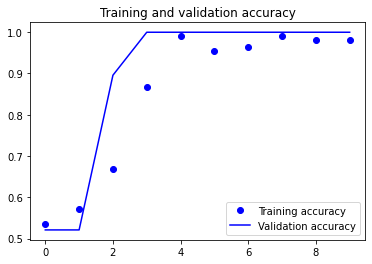

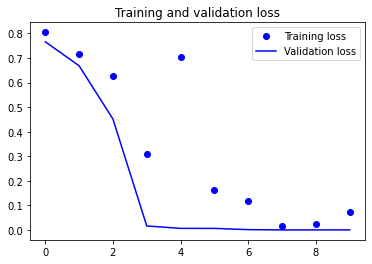

In [131]:
import matplotlib.pyplot as plt
accuracy = ML_train.history['accuracy']
val_accuracy = ML_train.history['val_accuracy']
loss = ML_train.history['loss']
val_loss = ML_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [132]:
ML_depth_model.save("/content/drive/MyDrive/ML_DATA/depthmodel.h5")

In [133]:
from tensorflow.keras.models import load_model
model_pred=load_model("/content/drive/MyDrive/ML_DATA/depthmodel.h5")


In [174]:
import cv2
from google.colab.patches import cv2_imshow
path_pred="/content/drive/MyDrive/ML_DATA//Project data/nyu/bedroom_0082_out/11.png"
path_pred_fake="/content/drive/MyDrive/ML_DATA/Project data/virtual11/office1-depth-clean/00080.png"

img_pred1=cv2.imread(path_pred,cv2.IMREAD_UNCHANGED)

In [175]:
img_predict=preprocessing.normalize(img_pred1)

In [176]:
prediction=model_pred.predict(img_predict.reshape(1,480,640,1))

1/1 [==============================] - 0s 245ms/step


In [177]:
print(prediction)

[[1.4856243e-09 1.0000000e+00]]
